# **Naive Bayes Classifier**

The **Naive Bayes classifier** is a family of probabilistic classifiers that rely on Bayes' Theorem and the assumption of feature independence. The classifier is called naive because it assumes that all the features in a dataset are independent of each other, which is rarely true in real-world scenarios, but it simplifies the computation.

Naive Bayes works by calculating the probabilities for each class and then predicting the class with the highest probability based on the input features. It is a powerful and simple algorithm for classification tasks, especially in domains like text classification (e.g., spam detection, sentiment analysis).

#### When to Use Naive Bayes Classifier?

Naive Bayes is particularly useful in the following scenarios:

- **When working with high-dimensional datasets**: It performs well with many features, such as in text classification where each word can be a feature.

- **When the assumption of conditional independence holds**: Even when this assumption is not completely true, Naive Bayes often performs surprisingly well in practice.

- **For real-time predictions**: Naive Bayes is computationally efficient and can handle large datasets quickly, making it suitable for real-time applications.

- **Text classification, sentiment analysis, and spam filtering**: These tasks involve high-dimensional and sparse data, where Naive Bayes shines.

- **Categorical input features**: The algorithm handles categorical variables well, especially in its Multinomial Naive Bayes variant.

#### How Does Naive Bayes Work?

Naive Bayes uses Bayes’ Theorem to calculate the probability of each class given the input features and predicts the class with the highest probability. 

Here’s how it works step-by-step:

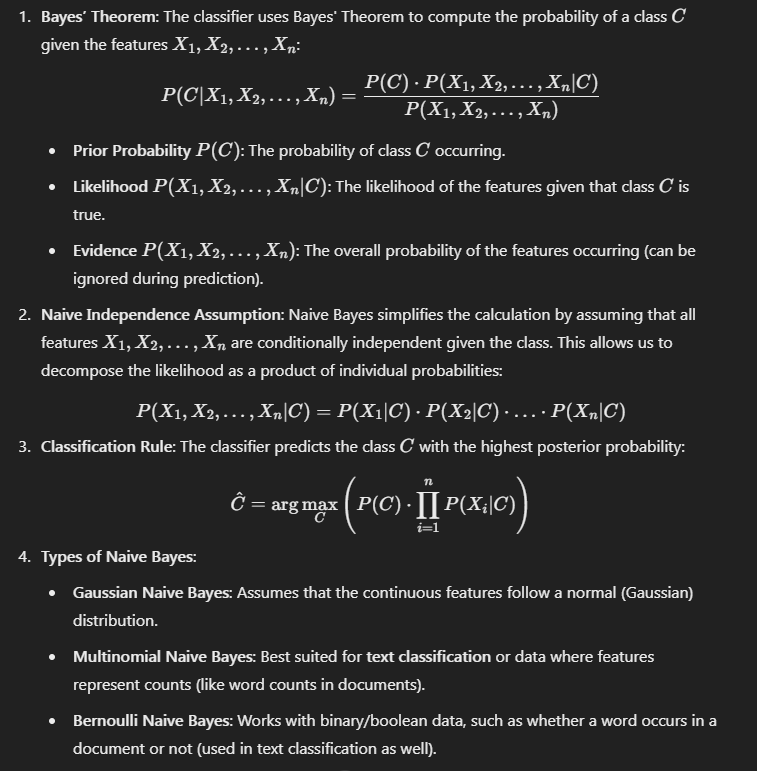

#### Who Should Use Naive Bayes Classifier?

Naive Bayes is an excellent choice for:

- **Data scientists and machine learning practitioners** who need a fast, simple, and interpretable model for classification tasks.

- **Business analysts** looking for text-based solutions, such as customer sentiment analysis, email spam filtering, or document categorization.

- **Researchers and developers** working with large-scale text processing, like in Natural Language Processing (NLP).

- **Beginners in machine learning**, as Naive Bayes is easy to implement and understand, while still being effective in many real-world scenarios.

#### Advantages of Naive Bayes Classifier:

- **Fast and efficient**: Naive Bayes is computationally efficient and works well with large datasets.

- **Handles high-dimensional data**: Especially useful for text classification problems where the data is sparse and high-dimensional.

- **Simple to implement**: The algorithm is simple to code and interpret, making it a good starting point for beginners.

- **Requires less training data**: It performs well with relatively small datasets because it estimates fewer parameters.

- **Performs well in practice**: Even though the independence assumption rarely holds true, Naive Bayes often works surprisingly well.

### Disadvantages of Naive Bayes Classifier:

- **Strong independence assumption**: The assumption that features are conditionally independent given the class can lead to suboptimal results if this condition is not met in the data.

- **Zero probability problem**: If a feature value that wasn’t seen in the training data appears in the test set, the model will assign a zero probability to that class. This can be mitigated using techniques like Laplace smoothing.

- **Not suitable for continuous data without modifications**: The basic form of Naive Bayes does not handle continuous data well unless it is adapted (e.g., Gaussian Naive Bayes).

- **Not ideal for highly correlated features**: Naive Bayes struggles when features are correlated since the independence assumption is violated.

#### Real-World Applications of Naive Bayes Classifier:

- **Email Spam Detection**: Classifies emails as spam or not based on the occurrence of certain words.

- **Text Classification**: Categorizes documents or news articles into different topics based on word occurrences (Multinomial Naive Bayes).

- **Sentiment Analysis**: Determines whether a review or a tweet is positive or negative by analyzing word frequencies (commonly used in NLP).

- **Medical Diagnosis**: Predicts diseases based on symptoms by calculating the probability of each condition.

- **Recommender Systems**: Helps in filtering and recommending content based on a user’s previous interactions and preferences.

In [55]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

num_items = 41
data = {
    'City Population': np.random.randint(10000, 1000000, num_items),
    'Continent': np.random.choice(['Asia', 'Europe', 'North America', 'South America'], num_items),
    'Venue Capacity': np.random.randint(500, 20000, num_items),
    'Day Of Week': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], num_items),
    'Multiple Concerts': np.random.randint(0, 2, num_items),
    'Sold Out': np.random.randint(0, 2, num_items)
}

df = pd.DataFrame(data)
#df = pd.read_csv('pear_jam_tour2.csv', encoding="unicode_escape")
df

,City Population,Continent,Venue Capacity,Day Of Week,Multiple Concerts,Sold Out
0,491817,North America,16665,Thursday,0,0
1,701437,Europe,9246,Monday,0,0
2,166930,Europe,8403,Thursday,0,0
3,588655,South America,4672,Saturday,0,1
4,388841,South America,1405,Friday,1,1
5,882813,Asia,18118,Sunday,1,1
6,158157,Asia,1666,Wednesday,1,0
7,117802,Asia,14382,Sunday,0,0
8,44163,North America,2502,Saturday,0,0
9,893911,North America,17897,Friday,1,1


In [56]:
df2 = pd.get_dummies(df[['Continent', 'Day Of Week']])

df2

,Continent_Asia,Continent_Europe,Continent_North America,Continent_South America,Day Of Week_Friday,Day Of Week_Monday,Day Of Week_Saturday,Day Of Week_Sunday,Day Of Week_Thursday,Day Of Week_Tuesday,Day Of Week_Wednesday
0,False,False,True,False,False,False,False,False,True,False,False
1,False,True,False,False,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,True,False,False,False,False
4,False,False,False,True,True,False,False,False,False,False,False
5,True,False,False,False,False,False,False,True,False,False,False
6,True,False,False,False,False,False,False,False,False,False,True
7,True,False,False,False,False,False,False,True,False,False,False
8,False,False,True,False,False,False,True,False,False,False,False
9,False,False,True,False,True,False,False,False,False,False,False


In [57]:
df3 = pd.concat([df, df2], axis=1)

df3

,City Population,Continent,Venue Capacity,Day Of Week,Multiple Concerts,Sold Out,Continent_Asia,Continent_Europe,Continent_North America,Continent_South America,Day Of Week_Friday,Day Of Week_Monday,Day Of Week_Saturday,Day Of Week_Sunday,Day Of Week_Thursday,Day Of Week_Tuesday,Day Of Week_Wednesday
0,491817,North America,16665,Thursday,0,0,False,False,True,False,False,False,False,False,True,False,False
1,701437,Europe,9246,Monday,0,0,False,True,False,False,False,True,False,False,False,False,False
2,166930,Europe,8403,Thursday,0,0,False,True,False,False,False,False,False,False,True,False,False
3,588655,South America,4672,Saturday,0,1,False,False,False,True,False,False,True,False,False,False,False
4,388841,South America,1405,Friday,1,1,False,False,False,True,True,False,False,False,False,False,False
5,882813,Asia,18118,Sunday,1,1,True,False,False,False,False,False,False,True,False,False,False
6,158157,Asia,1666,Wednesday,1,0,True,False,False,False,False,False,False,False,False,False,True
7,117802,Asia,14382,Sunday,0,0,True,False,False,False,False,False,False,True,False,False,False
8,44163,North America,2502,Saturday,0,0,False,False,True,False,False,False,True,False,False,False,False
9,893911,North America,17897,Friday,1,1,False,False,True,False,True,False,False,False,False,False,False


In [58]:
df4 = df3.drop(columns=['Continent', 'Day Of Week'], axis=1)
df4

,City Population,Venue Capacity,Multiple Concerts,Sold Out,Continent_Asia,Continent_Europe,Continent_North America,Continent_South America,Day Of Week_Friday,Day Of Week_Monday,Day Of Week_Saturday,Day Of Week_Sunday,Day Of Week_Thursday,Day Of Week_Tuesday,Day Of Week_Wednesday
0,491817,16665,0,0,False,False,True,False,False,False,False,False,True,False,False
1,701437,9246,0,0,False,True,False,False,False,True,False,False,False,False,False
2,166930,8403,0,0,False,True,False,False,False,False,False,False,True,False,False
3,588655,4672,0,1,False,False,False,True,False,False,True,False,False,False,False
4,388841,1405,1,1,False,False,False,True,True,False,False,False,False,False,False
5,882813,18118,1,1,True,False,False,False,False,False,False,True,False,False,False
6,158157,1666,1,0,True,False,False,False,False,False,False,False,False,False,True
7,117802,14382,0,0,True,False,False,False,False,False,False,True,False,False,False
8,44163,2502,0,0,False,False,True,False,False,False,True,False,False,False,False
9,893911,17897,1,1,False,False,True,False,True,False,False,False,False,False,False


In [59]:
X = df4.drop(columns=['Sold Out'], axis=1)
y = df4['Sold Out']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=33, test_size=0.2)
gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.75      0.75      0.75         4

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9



In [60]:
gnb.score(X_train, y_train)

0.5625

In [61]:
gnb.score(X_test, y_test)

0.7777777777777778

### Add in parameter

In [66]:
param_grid = {
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001]
}

grid_search = GridSearchCV(gnb,param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-08, 1e-09, 1e-08]},
             scoring='accuracy')

In [67]:
grid_search.best_params_

{'var_smoothing': 1e-08}

In [68]:
grid_search.best_score_

0.4095238095238095